# Example of a cross-correlation calculation

Cross-correlation measures the similarity between two signals as one signal slides over the other. It indicates how well one signal matches another as a function of the shift (lag or displacement) applied between them. 

\begin{equation}
(f \star g)(\tau) = \int_{-\infty}^{\infty} f^*(t)g(t+\tau) dt = \int_{-\infty}^{\infty} f^*(t-\tau)g(t) dt
\end{equation}

where $\tau$ is the time shift. The <u>autocorrelation function</u> is a specific case of cross-correlation where a signal is correlated with itself, so $f \equiv g$ in the definition above. The autocorrelation function typically has its maximum value at $\tau=0$, as the signal is most similar to itself without any shift. For discrete signals, the autocorrelation function is often normalized to have a value of 1 at zero lag.

<b>Cross-correlation theorem:</b> the Fourier transform of the cross-correlation function yields the so-called cross-spectral density (CSD) function.

\begin{equation}
\mathcal{F}\{f\star g\} = F^*(\omega) G(\omega)
\end{equation}


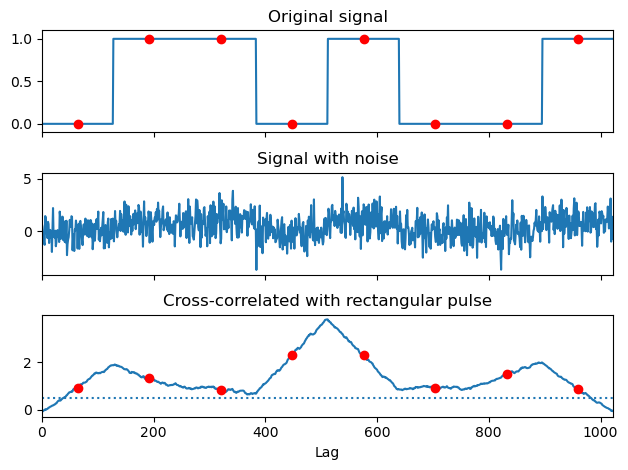

In [11]:
# Example from scipy.signal.correlate
# Implement a matched filter using cross-correlation, to recover a signal that has passed through a noisy channel.

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# noise
rng = np.random.default_rng()

# signal pattern
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)

# signal plus noise
sig_noise = sig + rng.standard_normal(len(sig))

# compute the cross-correlation
corr = signal.correlate(sig_noise, sig, mode='same') / 128

# used to place some red dots to mark states in time
clock = np.arange(64, len(sig), 128)

# Plotting the original signal, noisy one, and the cross-correlation result
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

A positive value of the cross-correlation at a particular lag means that the two signals tend to vary in the same direction. In other words, when one signal has a positive amplitude at a given time, the other signal also tends to have a positive amplitude at that time, and similarly for negative amplitudes. This suggests that there is a direct or "in-phase" relationship between the signals.

A negative value of the cross-correlation at a given lag means that the two signals tend to vary in opposite directions at that shift. When one signal is positive, the other is likely to be negative at that point, indicating an "out-of-phase" relationship or some degree of inverse correlation.

In [12]:
# Let's take the Fourier Transform of the clean signal
# Sampling rate (adjust as needed)
Fs = 1000  # Sampling rate in Hz (if time in seconds)

# Perform FFT on the clean signal
N = len(sig)  # Number of samples
ft_sig = np.fft.fft(sig)/len(sig)
freqs = np.fft.fftfreq(N, d=1/Fs)

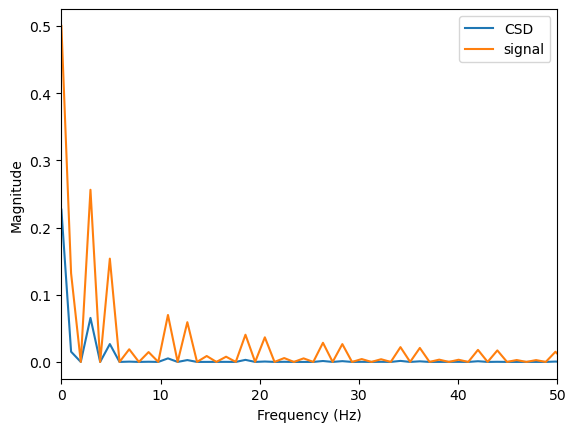

In [13]:
# Perform FFT on the noisy signal
ft_sig_noise = np.fft.fft(sig_noise)/len(sig_noise)

# Cross-spectral density using Fourier transforms
cross_spectral_density = ft_sig * np.conj(ft_sig_noise)

# Frequencies for plotting
# calculates the frequency bins in Hz, given the sampling interval d=1/Fs.
freqs = np.fft.fftfreq(len(sig), d=1/Fs)

# Cross-spectral density plot (CSD)
plt.figure()
plt.plot(freqs[:N // 2], np.abs(cross_spectral_density[:N // 2]),label='CSD')
plt.xlim(0, 50)

# Plot the FFT of the clean signal
plt.plot(freqs[:N // 2], np.abs(ft_sig[:N // 2]),label='signal') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

The comparison above suggests that the noisy signal (sig_noise) retains some of the key frequency components of the original signal (sig). The original signal has strong peaks at specific frequencies that match the CSD, meaning these frequencies were preserved even in the noisy signal by analyzing the CSD at that frequency. However, we can also see that many frequencies were "washed out" by the noise and are not significantly captured by the CSD.

The magnitude of the CSD at each frequency reveals how strongly correlated the noisy signal is to the original signal at that frequency. In the plot of the CSD magnitude, peaks indicate frequencies where the original and noisy signals are more strongly related, while lower values show frequencies where noise may have overwhelmed the original signal.

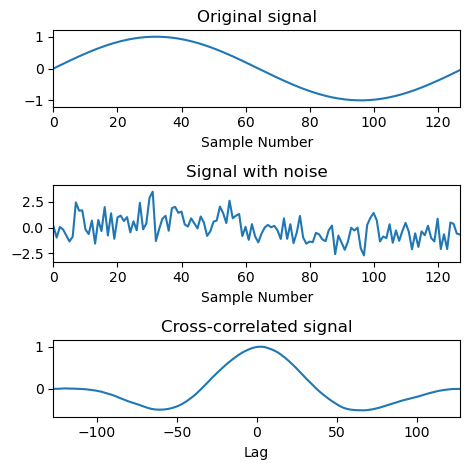

In [14]:
# Another example
x = np.arange(128) / 128
sig = np.sin(2 * np.pi * x)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))
corr /= np.max(corr)

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

# Example of a convolution calculation

Convolution is used to measure the overlap of two signals as one signal is flipped and shifted over the other. Convolution is used to model how signals or functions are modified by a system (e.g., filtering, which is common in signal and image processing).

For two signals $f(t)$ and $g(t)$, their convolution is defined as 

\begin{equation}
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)d\tau = \int_{-\infty}^{\infty} f(t-\tau)g(\tau)d\tau
\end{equation}

where $g(t-\tau)$ is the flipped version of $g(t)$ shifted by $t$.

<b>Convolution theorem:</b> convolution in the time domain is equal to multiplication in the frequency domain, and vice-versa.

\begin{equation}
\mathcal{F}\{f * g\} = F(\omega) G(\omega)
\end{equation}


Time (in seconds):  0.00011499994434416294


C:\Users\cgroc\AppData\Local\Temp\ipykernel_20192\406011035.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


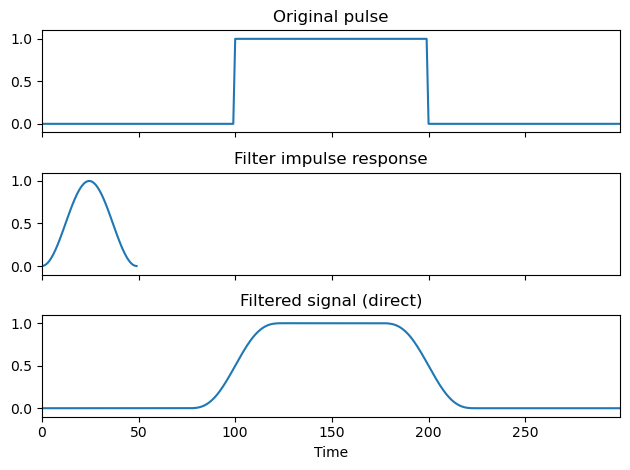

In [15]:
import timeit

# Smooth a square pulse using a Hann window
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)

# Calculating convolution through direct method
start = timeit.default_timer()
filtered_time = signal.convolve(sig, win, method='direct', mode='same') / sum(win)
stop = timeit.default_timer()
print('Time (in seconds): ', stop - start)  

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered_time)
ax_filt.set_title('Filtered signal (direct)')
ax_filt.margins(0, 0.1)
ax_filt.set_xlabel('Time')
fig.tight_layout()
fig.show()

Time (in seconds):  0.00045679998584091663


C:\Users\cgroc\AppData\Local\Temp\ipykernel_20192\2198224058.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


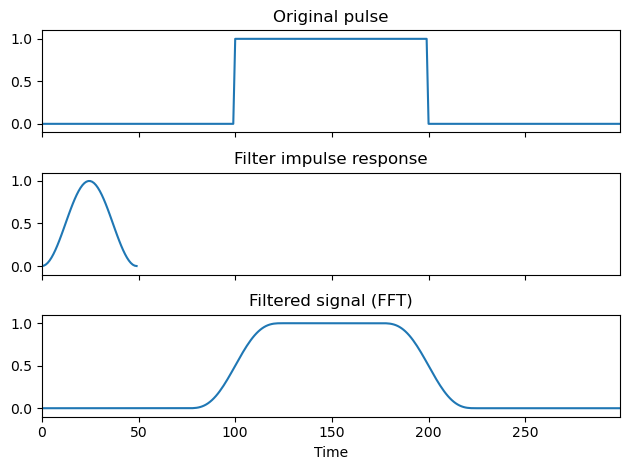

In [16]:
# Calculating convolution through FFT (inverse Fourier transform)
start = timeit.default_timer()
fftconv = signal.fftconvolve(sig, win, mode='same')/ sum(win)
stop = timeit.default_timer()
print('Time (in seconds): ', stop - start) 

# You will not see much of a time difference in this simple case.
# the fftconv method becomes more efficient for long-term signals.

fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(fftconv)
ax_filt.set_title('Filtered signal (FFT)')
ax_filt.margins(0, 0.1)
ax_filt.set_xlabel('Time')
fig.tight_layout()
fig.show()

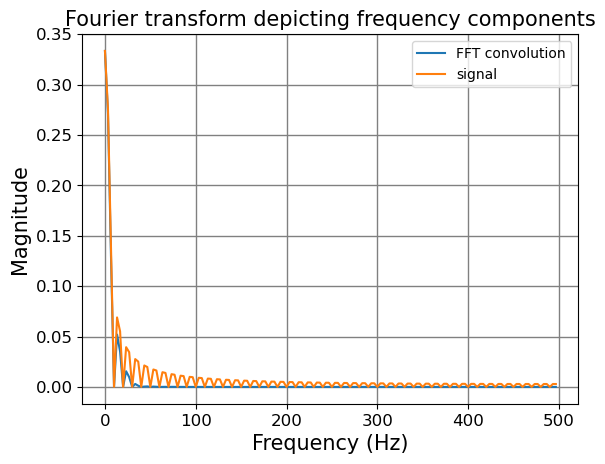

In [17]:
# manually set the sampling frequency
samplingFrequency   = 1000 # Example: 1000 Hz sampling rate
samplingInterval = 1 / samplingFrequency

# Fourier Transform
fourierTransform = np.fft.fft(filtered_time)/len(filtered_time)
fourierTransform = fourierTransform[range(int(len(filtered_time)/2))]

# Relevant parameters of the Fourier Transform
tpCount     = len(filtered_time)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# To create the frequency axis, we need the sampling rate in reciprocal space
frequency_axis = np.fft.fftfreq(tpCount, d=1/samplingFrequency)
norm_fft_amplitude = np.abs(fourierTransform)/tpCount

plt.title('Fourier transform depicting frequency components',fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(frequencies, abs(fourierTransform),label='FFT convolution')
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Perform FFT on the clean signal
N = len(sig)  # Number of samples
ft_sig = np.fft.fft(sig)/len(sig)
freqs = np.fft.fftfreq(N, d=1/Fs)

# Plot the FFT of the clean signal
plt.plot(freqs[:N // 2], np.abs(ft_sig[:N // 2]),label='signal') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

The code below is just another example of how to investigate the frequency spectrum further and placing vertical lines at reference signals. This can be changed depending on the analysis or signal to be studied.

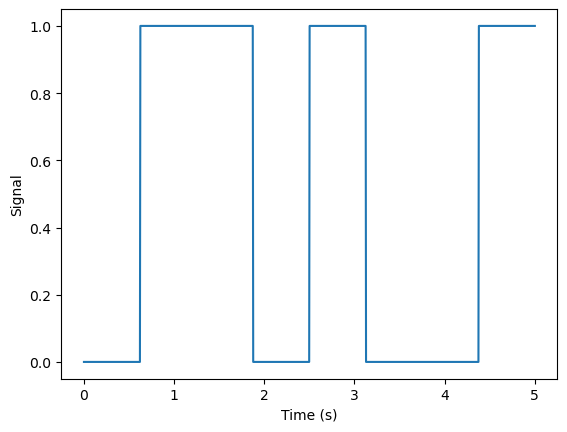

Fundamental frequency (f0): 0.20 Hz
Maximum frequency estimated in the signal (f_max): 102.30 Hz


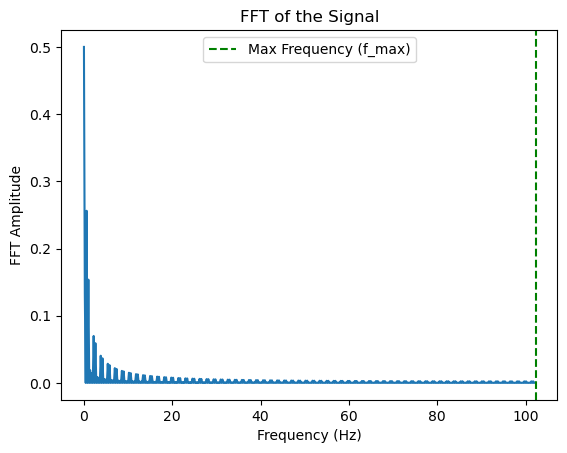

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)  # 1024 samples
N = len(sig)  # Number of samples in the signal

# Define a timeline in seconds
T = 5.0 #(in seconds)
time = np.linspace(0,T,N)
dt = (time[1] - time[0])

# Sampling rate
Fs = 1/dt

plt.figure()
plt.plot(time, sig)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

# Fundamental frequency f0 taken over the whole period T
f0 = 1/T

# The maximum frequency estimated at most half the sampling frequency
f_max = Fs / 2

# Print the results
print(f"Fundamental frequency (f0): {f0:.2f} Hz")
print(f"Maximum frequency estimated in the signal (f_max): {f_max:.2f} Hz")

# Perform FFT
fft_sig = np.fft.fft(sig)
freqs = np.fft.fftfreq(N, d=1/Fs)  # Assuming Fs = 1/dt for analysis

# Plot the magnitude spectrum
magnitude = np.abs(fft_sig) / N  # Normalize by N

plt.figure()
plt.plot(freqs[:N // 2], magnitude[:N // 2])  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.title('FFT of the Signal')
plt.axvline(x=f_max, color='g', linestyle='--', label='Max Frequency (f_max)')
plt.legend()
plt.show()
